<a href="https://colab.research.google.com/github/Zarathos01/Machine-learning-is-fun/blob/main/Sentiment140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [ ]:
df = pd.read_csv(path + "/training.1600000.processed.noemoticon.csv", encoding="latin-1", names=['sentiment', 'id', 'date', 'flag', 'user', 'text'])
df

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df = df[['text', 'sentiment']]  # Keep only text and label
df['sentiment'] = df['sentiment'].map({4: 1, 0: 0})
df

<ipython-input-4-ab70a5804ce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].map({4: 1, 0: 0})


,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1600000 non-null  object
 1   sentiment  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
0,800000
1,800000


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import word_tokenize, MWETokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df['sentiment'].isnull().sum())
print(df['text'].isnull().sum())

0
0


In [ ]:
import string
!pip install contractions
from contractions import fix

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces


    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@user) and hashtags (#tag)
    text = re.sub(r'@\w+|#\w+', '', text)

     # Remove emojis (Unicode ranges)
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    text = fix(text)

    return text

df['text'] = df['text'].apply(clean_text)
df

<ipython-input-10-671e8da11c16>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_text)


,text,sentiment
0,switchfoot awww that is a bummer you shoulda ...,0
1,is upset that he cannot update his facebook by...,0
2,kenichan i dived many times for the ball manag...,0
3,my whole body feels itchy and like its on fire,0
4,nationwideclass no its not behaving at all i a...,0
...,...,...
1599995,just woke up having no school is the best feel...,1
1599996,thewdbcom very cool to hear old walt interview...,1
1599997,are you ready for your mojo makeover ask me fo...,1
1599998,happy th birthday to my boo of alll time tupac...,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['sentiment']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''!pip uninstall gensim -y
!pip install gensim
import os
os.kill(os.getpid(), 9)'''

'!pip uninstall gensim -y\n!pip install gensim\nimport os\nos.kill(os.getpid(), 9)'

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenize sentences
train_sentences = [word_tokenize(sent) for sent in X_train]

# Skip-gram model (better for rare words)
model = Word2Vec(
    sentences=train_sentences,
    vector_size=100,  # Embedding dimension
    window=5,        # Context window
    min_count=5,     # Ignore rare words
    sg=1,            # 1=Skip-gram, 0=CBOW
    workers=4        # Parallel threads
)

# Save model
model.save("twitter_word2vec.model")

# Example: Find similar words
print(model.wv.most_similar("happy", topn=5))

[('happpy', 0.7439090609550476), ('dayhappy', 0.7025384902954102), ('happppy', 0.6941989660263062), ('xsavedgex', 0.6881008148193359), ('thankful', 0.6816678643226624)]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

# TF-IDF with n-grams
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, C=1.0)
lr.fit(X_train_tfidf, y_train)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test_tfidf))}")
print(classification_report(y_test, lr.predict(X_test_tfidf)))

Accuracy: 0.811165625
              precision    recall  f1-score   support

           0       0.82      0.80      0.81    159494
           1       0.80      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



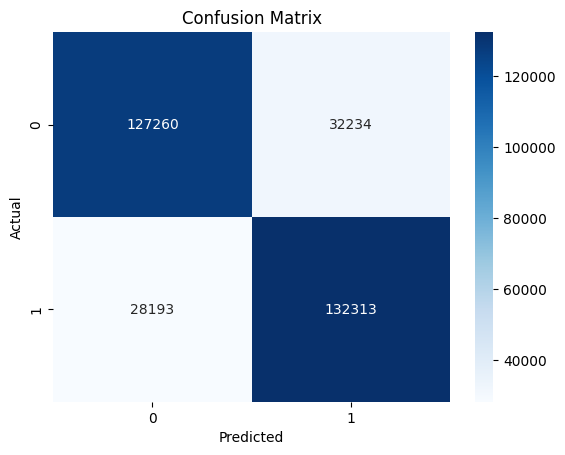

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_tfidf)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.svm import SVC

def average_embeddings(tokens, model):
    embeddings = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

# Convert sentences to vectors
X_train_w2v = np.array([average_embeddings(sent, model) for sent in train_sentences])
X_test_w2v = np.array([average_embeddings(word_tokenize(sent), model) for sent in X_test])

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train_w2v, y_train)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, svm.predict(X_test_w2v))}")
print(classification_report(y_test, svm.predict(X_test_w2v)))

In [ ]:
from scipy.sparse import hstack

# Combine features
X_train_hybrid = hstack([X_train_tfidf, X_train_w2v])
X_test_hybrid = hstack([X_test_tfidf, X_test_w2v])

# Train classifier
lr_hybrid = LogisticRegression(max_iter=1000)
lr_hybrid.fit(X_train_hybrid, y_train)

print(classification_report(y_test, lr_hybrid.predict(X_test_hybrid)))

In [ ]:
!pip install joblib
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Save both the vectorizer and vocabulary
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

# Optional: Save vocabulary separately
with open("tfidf_vocab.pkl", "wb") as f:
    pickle.dump(tfidf_vocab, f)  # Your custom vocab dictionary

In [ ]:
#  joblib (recommended for sklearn)
joblib.dump(lr, "sentiment_lr.joblib")

# pickle (alternative)
import pickle
with open("sentiment_svm.pkl", "wb") as f:
    pickle.dump(svm, f)